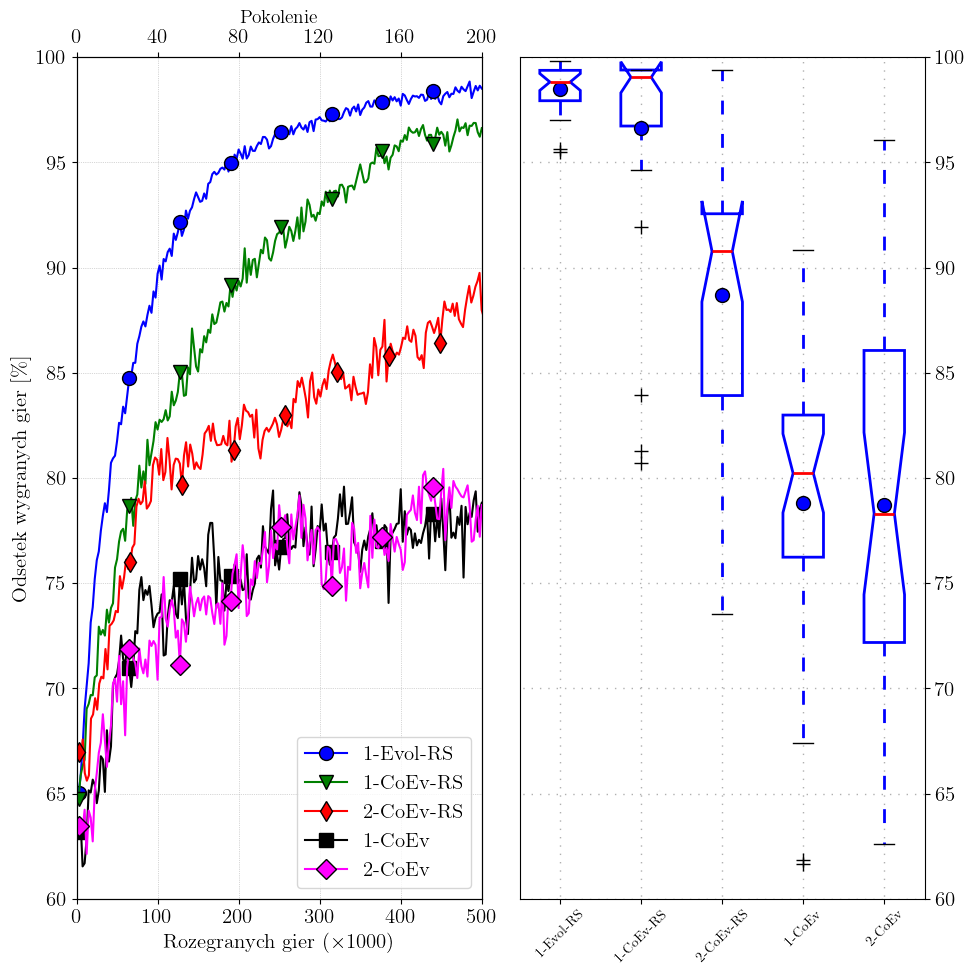

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

mpl.rcParams['text.usetex'] = True 
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.size'] = 15


def load_data(file_path):
    return pd.read_csv(file_path, sep=',')

def calculate_mean_values(data):
    return data.iloc[:, 2:].mean(axis=1) #wszystkie wiersze, od kolumny 2, bez 0 i 1, średnia obliczana wzdłuż wierszy

def plot_all(data_dict):
    fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 10))

    
    colors = ['blue', 'green', 'red', 'black', 'magenta']
    markers = ['o', 'v', 'd', 's', 'D']
    lines = []
    
    
    for i, (name, data) in enumerate(data_dict.items()):
        effort = data['effort']
        generations = data['generation']
        mean_values = calculate_mean_values(data)
        ax1.plot(effort/1000, mean_values*100, linestyle='-', color=colors[i], marker=markers[i], markeredgecolor='black', label=name, markersize = 10, markevery = 25)
        #plt.plot(effort[::25]/1000, mean_values[::25], linestyle='', color = colors[i], marker = markers[i], markersize = 10)
        
    ax1.set_xlabel(r'Rozegranych gier $(\times 1000)$')
    ax1.set_ylabel('Odsetek wygranych gier [\%]')
    ax1.grid(True, linestyle=':', linewidth= 0.5)
    ax1.set_xlim(0, 500)
    ax1.set_ylim(60, 100)
    
    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())
    ax2.set_xticks(np.linspace(0, 500, 6))
    ax2.set_xticklabels(np.linspace(0, 200, 6, dtype=int))
    ax2.set_xlabel(r'Pokolenie', fontsize=14)
    #generation_ticks = generations[::len(generations)//10]
    #ax2.set_xticks(effort[::len(effort)//10])
    #ax2.set_xticklabels(generation_ticks)
    ax2.set_xlabel(r'Pokolenie')
    ax1.legend(loc='lower right')

    
    last_row_values = []

    
    for name, data in data_dict.items():
        last_row = data.iloc[-1, 2:]
        #print(f"Last row for {name}: {last_row.values}")
        last_row_values.append(last_row*100)
        
    if len(last_row_values) == 0:
        print("brak danych")
        return
        
    ax3.boxplot(last_row_values, vert=True, patch_artist=True, notch=True,
                boxprops=dict(facecolor='none', color='blue', linewidth=2),
                capprops=dict(color='black'),
                whiskerprops=dict(color='blue', linestyle=(0, (5, 7)), linewidth=2),
                flierprops=dict(marker='+', color='blue', markersize=10),
                medianprops=dict(color='red', linewidth=2))            
    means = [np.mean(vals) for vals in last_row_values]
    for i, mean in enumerate(means, start = 1):
        ax3.plot(i, mean, marker='o', color='blue', markeredgecolor='black', markersize = 10)
        
    ax3.set_xticklabels(data_dict.keys(), rotation=45, fontsize=10)
    ax3.yaxis.set_label_position("right")
    ax3.yaxis.tick_right()
    ax3.set_ylim(60,100)
    ax3.set_yticks(np.arange(60, 101, 5))
    ax3.grid(True, linestyle=(10, (1, 5)), linewidth=1)

    plt.tight_layout()
    plt.savefig('myplot.pdf')


def main():
    file_paths = {
        "1-Evol-RS": "1ers.csv",
        "1-CoEv-RS": "1crs.csv",
        "2-CoEv-RS": "2crs.csv",
        "1-CoEv": "1c.csv",
        "2-CoEv": "2c.csv"
}

    data_dict = {name: load_data(path) for name, path in file_paths.items()}
    plot_all(data_dict)

    
if __name__ == '__main__':
    main()

    